_The main focus of this assignment is Frequent Patternset Mining from theoretical as well as practical perspective_

## Problem 1: Association Rule Mining

Consider the following dataset

{onion, apple, butter, yogurt, eggs, apple} <br>
{onion, apple, butter, yogurt, eggs, milk} <br>
{eggs, milk, butter, yogurt, eggs, milk} <br>
{cheese, milk, butter, yogurt, eggs, milk} <br>
{cheese, milk, eggs, milk}

- Using the FP-Tree algorithm with min support  = 0.6 and min confidence = 0.75 find all 3-frequent and all 4-frequent items. Show your work.
- List 3 frequent item rulesets that can be derived from the previous set
- Show that any 3-frequent itemsets can be derived from 2-frequent itemsets

1.  Calculate support

| Word | Count | Suppport Frequency | Meets Min Suppport |
|---|---|---|---|
|milk|7|1.4|x|
|eggs|5|1.0|x|
|butter|4|0.8|x|
|yogurt|4|0.8|x|
|apple|2|0.4| |
|cheese|2|0.4| |
|onion|2|0.4| |


2.  Eliminate items that don't meet minimum support. Remaining frequent set: {milk, eggs, butter, yogurt}

| Itemset | Ordered Itemset |
|---|---|
|{onion, apple, butter, yogurt, eggs, apple}|{eggs, butter, yogurt}|
|{onion, apple, butter, yogurt, eggs, milk}|{milk, eggs, butter, yogurt}|
|{eggs, milk, butter, yogurt, eggs, milk}|{milk, eggs, butter, yogurt}|
|{cheese, milk, butter, yogurt, eggs, milk}|{milk, eggs, butter, yogurt}|
|{cheese, milk, eggs, milk}|{milk, eggs}|


3.  Calculate confidence from 2-word combinations from frequent set:

| Itemset | Confidence | Meets Min Confidence |
|---|---|---|
|{milk,eggs}| 0.8 | x |
|{milk,butter}| 0.6 |  |
|{milk,yogurt}| 0.6 |  |
|{eggs,butter}| 0.8 | x |
|{eggs,yogurt}| 0.8 | x |
|{butter,yogurt}| 0.8 | x |


4.  Calculate confidence from 3-word combinations from set above confidence minimum:

| Itemset | Confidence | Meets Min Confidence |
|---|---|---|
|{milk,eggs,butter}| 0.75 | x |
|{milk,eggs,yogurt}| 0.75 | x |
|{eggs,butter,yogurt}| 1.0 | x |



5.  Calculate confidence from 4-word combinations from set above confidence minimum:

| Itemset | Confidence | Meets Min Confidence |
|---|---|---|
|{milk,eggs,butter,yogurt}| 0.75 | x |



**3-frequent items: {milk,eggs,butter}, {milk,eggs,yogurt}, {eggs,butter,yogurt}**

**4-frequent items: {milk,eggs,butter,yogurt}**


If you have 2-frequent itemsets, and if those 2-frequent itemsets have at least one common element, then it follows that you have a 3-frequent itemset. As an example, imagine you have the 2-frequent itemsets: {milk, eggs} and {eggs, butter} and {milk, butter}. Then, it follows that you would have the 3-frequent itemset {milk, eggs, butter}. Conversely, if you have a 3-frequent itemset, then it is safe to say that you will find the 2-frequent itemsets that are a subset of the 3-frequent itemset. That is, if you have {milk, eggs, butter}, you will find {milk, eggs}, {eggs, butter}, and {milk, butter}.

_Note: Do not write code to answer this question_

## Problem 2: Applications of FP Mining

Using the NIS Flanders Traffic Accident Dataset apply Frequent Itemset Mining to identify the road conditions, type of roads associated with accidents. Identify other rules of interest that are associated with accidents or lack thereof. Make a case regarding how you can use these rules to reduce traffic accidents.


In [1]:
# Load the Relevant libraries
import sklearn as sk
import urllib

import numpy as np
import pandas as pd

import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

import matplotlib.pyplot as plt
%matplotlib inline

# URL for the Traffic Data (UW Repository)
# link for dataset description http://fimi.uantwerpen.be/data/accidents.pdf
url = "NISTraffic.csv"

# download the file
#raw_data = urllib.urlopen(url)
df = pd.read_csv(url, header=None)

In [2]:
# The number of transactions is 340,183

print(df.shape)
df.head(10)

(340183, 51)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1,2,3,4,5,6,7,8,9,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,7,8,9,10,12,13,14,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,10,12,13,14,15,16,17,18,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5,8,10,12,14,15,16,17,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,8,10,12,14,15,16,17,18,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7,8,10,12,17,18,21,23,24,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,12,14,15,16,17,18,21,22,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,12,14,15,16,17,18,21,22,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,8,10,12,14,15,16,17,18,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,8,12,13,14,15,16,17,18,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


count    340183.000000
mean         33.807892
std           2.936422
min          18.000000
25%          32.000000
50%          34.000000
75%          36.000000
max          51.000000
dtype: float64


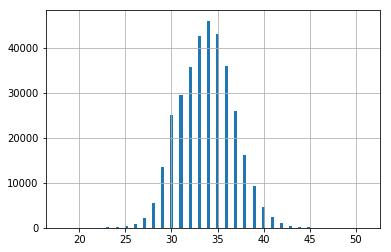

In [3]:
# The average number of transactions is 33.8.
# The minimum number of transations is 18.

z = df.count(axis=1)
print(z.describe())
z.hist(bins=100)
plt.show()

count    1.150087e+07
mean     5.506462e+01
std      6.741093e+01
min      1.000000e+00
25%      1.800000e+01
50%      3.100000e+01
75%      6.300000e+01
max      4.680000e+02
dtype: float64


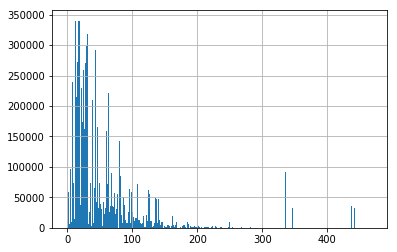

17.0    340151
12.0    339601
18.0    339095
16.0    332414
31.0    318014
dtype: int64


In [4]:
# The number of items is 468.
# The top 5 items appearing most often are 17, 12, 18, 16, 31

x = df.values.flatten()
x = x[~np.isnan(x)]

bins = np.arange(0,469,1)
z = pd.Series(x)
print(z.describe())
z.hist(bins=bins)
plt.show()

print(z.value_counts().iloc[:5])

In [5]:
# Read in at once to more easily put it into lists
nistraffic = pd.read_csv('NISTraffic.csv', sep = ' ')
nistraffic.columns = ['Items']

nistraffic['Items_RemoveNull'] = nistraffic['Items'].str.replace(',,','')
nistraffic['Items_RemoveNull'] = nistraffic['Items_RemoveNull'].apply(lambda x: x.rstrip(','))

dataset = nistraffic['Items_RemoveNull'].str.split(',').tolist()

print("Size of dataset =", len(dataset))

num_transactions = 4
print("First %d transactions:" % (num_transactions))
for i in range(num_transactions):
    print("Transaction %d:" % (i), dataset[i], '\n')

Size of dataset = 340182
First 4 transactions:
Transaction 0: ['2', '5', '7', '8', '9', '10', '12', '13', '14', '15', '16', '17', '18', '20', '22', '23', '24', '25', '27', '28', '29', '32', '33', '34', '35', '36', '37', '38', '39'] 

Transaction 1: ['7', '10', '12', '13', '14', '15', '16', '17', '18', '20', '25', '28', '29', '30', '33', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52'] 

Transaction 2: ['1', '5', '8', '10', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25', '26', '27', '28', '29', '30', '31', '41', '43', '46', '48', '49', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61'] 

Transaction 3: ['5', '8', '10', '12', '14', '15', '16', '17', '18', '21', '22', '24', '25', '26', '27', '28', '29', '31', '33', '36', '38', '39', '41', '43', '46', '56', '62', '63', '64', '65', '66', '67', '68'] 



In [6]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
#print("Finished fit and transform of TransactionEncoder.")
data = pd.DataFrame(te_ary, columns=te.columns_)
#print("Running apriori...")
frequent_itemsets = apriori(data, min_support=0.9, use_colnames=True)

frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False).reset_index(drop=True)

In [7]:
frequent_itemsets

,support,itemsets
0,0.999906,(17)
1,0.998289,(12)
2,0.998195,"(17, 12)"
3,0.996802,(18)
4,0.996708,"(18, 17)"
5,0.996290,"(18, 12)"
6,0.996196,"(18, 17, 12)"
7,0.977162,(16)
8,0.977068,"(17, 16)"
9,0.976430,"(16, 12)"


Here, we have used the full dataset to mine for associations with a minimum support above 0.9 to quickly see what the strongest and most common associations are. Looking at the list of frequent_itemsets above, we see that items 17, 12, 18, and 16 are by far the most singly important itemsets, as supported by the analysis we did above. However, we see that these four are present in the most combinations, as well, e.g. (17,12,18), (17,12,18,16), (17,12,18,31), (17,12,18,16,31). Unfortunately, we don't have the decoder to see what 17 represents. It could be something coincidental or correlated, such as week. In which case, it could be that by far more accidents occur on weeks by sheer numbers due to the increased number of days or the increased number of drivers (e.g., commuters). Or, it could be something causal, such as weather (snow), that leads to a higher proportion of accidents. Without this key, we can't make this determination definitively. 